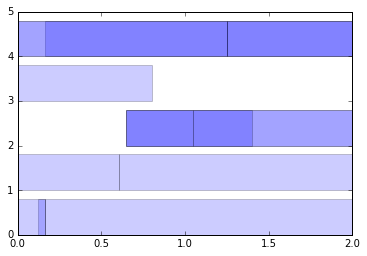

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

"""
  R5 <= 1.25
  |   X70 <= 0.16275
  |   |   X31 <= 0.65
  |   |   |   X42 <= 0.60515: good (47.0)
  |   |   |   X42 > 0.60515
  |   |   |   |   X14 <= 0.801: bad (55.0)
  |   |   |   |   X14 > 0.801
  |   |   |   |   |   X70 <= 0.124: bad (4.0)
  |   |   |   |   |   X70 > 0.124: good (7.0)
  |   |   X31 > 0.65: bad (1058.0)
  |   X70 > 0.16275: good (171.0)
  R5 > 1.25
  |   X31 <= 0.65: bad (36.0)
  |   X31 > 0.65
  |   |   X31 <= 1.05: good (909.0)
  |   |   X31 > 1.05
  |   |   |   X31 <= 1.4: good (26.0)
  |   |   |   X31 > 1.4: bad (7.0)

  good (47.0):
    X42 <= .60515
    X31 <= 0.65
    X70 <= 0.16275
    R5 <= 1.25
  good (7.0):
    X70 > 0.124, X70 <= 0.16275
    X14 > 0.801
    X42 > 0.60515
    X31 <= 0.65
    R5 <= 1.25
  good (171.0)
    X70 > 0.16275
    R5 <= 1.25
  good (909.0)
    X31 > 0.65, X31 <= 1.05
    R5 > 1.25
  good (26.0)
    X31 > 1.05, X31 <= 1.4
    R5 > 1.25

"""

params = ['X70', 'X42', 'X31', 'X14', 'R5']

rangeSets = [
    {
        'X42': (None, 0.60515),
        'X31': (None, 0.65),
        'X70': (None, 0.16275),
        'R5': (None, 1.25)
    },
    {
        'X70': (0.124, 0.16275),
        'X14': (0.801, None),
        'X42': (0.60515, None),
        'X31': (None, 0.65),
        'R5': (None, 1.25)
    },
    {
        'X70': (0.16275, None),
        'R5': (None, 0.16275)
    },
    {
        'X31': (0.65, 1.05),
        'R5': (1.25, None)
    },
    {
        'X31': (1.05, 1.4),
        'R5': (1.25, None)
    }
]

for rangeSet in rangeSets:
    bottom = []
    width = []
    left = []
    for i, param in enumerate(params):
        bottom.append(i)
        if param in rangeSet:
            upper, lower = rangeSet[param]
            if upper is None:
                upper = 2
            if lower is None:
                lower = 0
            width.append(upper - lower)
            left.append(lower)
        else:
            width.append(0)
            left.append(0)
    plt.barh(bottom, width, 0.8, left, alpha=0.2)